In [2]:
import pandas as pd
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [3]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/syedamishrasaiara/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/syedamishrasaiara/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/syedamishrasaiara/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
df = pd.read_csv('/Users/syedamishrasaiara/pythonprojects/tweets_2024.csv')  # Replace with actual file path
print(df.head())  # Display first few rows

                 created_at  \
0  2024-02-12T01:52:00.000Z   
1  2024-02-12T01:20:00.000Z   
2  2024-02-12T01:15:36.000Z   
3  2024-02-12T01:15:17.000Z   
4  2024-02-12T02:01:18.000Z   

                                                text  conversation_id  \
0   Fireman at the Superbowl https://t.co/AjqmmHvDQl     1.756859e+18   
1  Watch the #SuperBowl ads for #GhostsCBS, #Fire...     1.756851e+18   
2  Watch the #Tracker and #FireCountry #SuperBowl...     1.756828e+18   
3  I can't believe Norman Bates brother is a fire...     1.756849e+18   
4  👉 @NFL &amp; @fifa may be occut but some of th...     1.756861e+18   

    edit_history_tweet_ids  possibly_sensitive reply_settings lang  \
0  ['1756858660205015180']               False       everyone   en   
1  ['1756850607573623005']               False       everyone   en   
2  ['1756849502018064847']               False       everyone   en   
3  ['1756849420442681386']               False       everyone   en   
4  ['1756861000693739724

/var/folders/pw/pv_ywjx56q70gx265dkhp_080000gn/T/ipykernel_46848/2016049249.py:1: DtypeWarning: Columns (30,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/syedamishrasaiara/pythonprojects/tweets_2024.csv')  # Replace with actual file path


In [5]:
print(df.info())  # Check data types and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171454 entries, 0 to 171453
Data columns (total 34 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   created_at                         171454 non-null  object 
 1   text                               171454 non-null  object 
 2   conversation_id                    171454 non-null  float64
 3   edit_history_tweet_ids             171454 non-null  object 
 4   possibly_sensitive                 171454 non-null  bool   
 5   reply_settings                     171454 non-null  object 
 6   lang                               171454 non-null  object 
 7   author_id                          171454 non-null  float64
 8   id                                 171454 non-null  float64
 9   entities.urls                      81596 non-null   object 
 10  entities.annotations               156299 non-null  object 
 11  edit_controls.edits_remaining      1714

In [6]:
df.dropna(subset=['text'], inplace=True)  # Drop rows where tweets are missing
df.reset_index(drop=True, inplace=True)


In [7]:
import spacy

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

def clean_tweet_spacy(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions (@user)
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation

    doc = nlp(text)  # Process text using spaCy
    tokens = [token.lemma_ for token in doc if not token.is_stop]  # Lemmatization & stopword removal
    return " ".join(tokens)

df['cleaned_tweet'] = df['text'].apply(clean_tweet_spacy)
print(df[['text', 'cleaned_tweet']].head())


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/opt/homebrew/Cellar/python@3.9/3.9.21/Frameworks/Python.framework/Versions/3.9/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/homebrew/Cellar/python@3.9/3.9.21/Frameworks/Python.framework/Versions/3.9/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/Users/syedamishrasaiara/pythonprojects/ven/lib/python3.9/site-packages/ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "/Users/sy

                                                text  \
0   Fireman at the Superbowl https://t.co/AjqmmHvDQl   
1  Watch the #SuperBowl ads for #GhostsCBS, #Fire...   
2  Watch the #Tracker and #FireCountry #SuperBowl...   
3  I can't believe Norman Bates brother is a fire...   
4  👉 @NFL &amp; @fifa may be occut but some of th...   

                                       cleaned_tweet  
0                                  fireman superbowl  
1                                    watch   ad       
2                            watch      ad cbs run    
3     not believe norman bate brother fire fighter    
4     amp   occut athlete believer amp brother   ...  


In [8]:
print(df['cleaned_tweet'].dtype)  # Should be "object" (string)

object


In [9]:
print(df.dtypes)  # Check data types of all columns

created_at                            object
text                                  object
conversation_id                      float64
edit_history_tweet_ids                object
possibly_sensitive                      bool
reply_settings                        object
lang                                  object
author_id                            float64
id                                   float64
entities.urls                         object
entities.annotations                  object
edit_controls.edits_remaining          int64
edit_controls.is_edit_eligible          bool
edit_controls.editable_until          object
geo.place_id                          object
attachments.media_keys                object
public_metrics.retweet_count           int64
public_metrics.reply_count             int64
public_metrics.like_count              int64
public_metrics.quote_count             int64
public_metrics.bookmark_count          int64
public_metrics.impression_count        int64
entities.h

In [10]:
print(df['cleaned_tweet'].head())  # Check first few rows

0                                    fireman superbowl
1                                      watch   ad     
2                              watch      ad cbs run  
3       not believe norman bate brother fire fighter  
4       amp   occut athlete believer amp brother   ...
Name: cleaned_tweet, dtype: object


In [11]:
print(df['cleaned_tweet'].isnull().sum())  # Count missing values

0


In [12]:
df['cleaned_tweet'] = df['cleaned_tweet'].fillna("")
df['cleaned_tweet'] = df['cleaned_tweet'].astype(str)

df['cleaned_tweet'] = df['cleaned_tweet'].astype(str).fillna("")



In [14]:
all_words = ' '.join(df['cleaned_tweet'].dropna())  # Drop NaN values before joining
# Join all tweets into a single string
all_words = ' '.join(df['cleaned_tweet'])
print(type(all_words))  # Should be <class 'str'>
print(all_words[:500])  # Print first 500 characters to check for issues


<class 'str'>
fireman superbowl watch   ad      watch      ad cbs run   not believe norman bate brother fire fighter      amp   occut athlete believer amp brother    

                   en uno de los comerciales estelare del   para la cerveza 

      dan man marino jason sudeikis star new   spot michelob ultra 

 look                       okay 
    okay 

  commercial     funny 
  funny 
  ok 
 movie trailer amazing 
 sad s memorable chat worthy  
 boycott nerds candy 
 boycott  
 boycott twister movie 
 bo


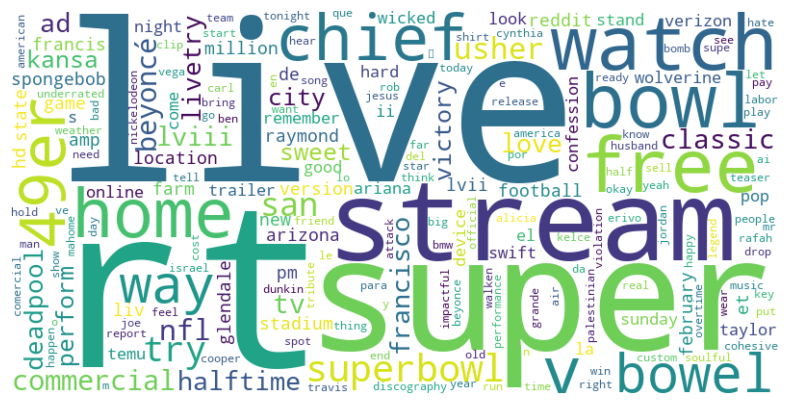

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(all_words)

if not all_words.strip():  # Check if string is empty
    print("Error: No valid text found for WordCloud")

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [16]:
from collections import Counter

word_list = all_words.split()
word_counts = Counter(word_list)
print(word_counts.most_common(10))  # Top 10 words

[('rt', 99522), ('live', 91798), ('super', 65334), ('stream', 46180), ('watch', 41291), ('bowl', 40534), ('free', 39200), ('2024', 32323), ('home', 32281), ('vs', 29744)]


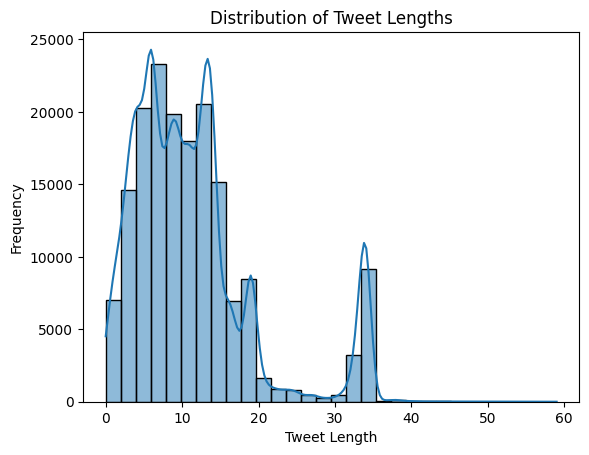

In [17]:
import seaborn as sns

df['tweet_length'] = df['cleaned_tweet'].apply(lambda x: len(x.split()))

sns.histplot(df['tweet_length'], bins=30, kde=True)
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths')
plt.show()

In [18]:
pip install textblob


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


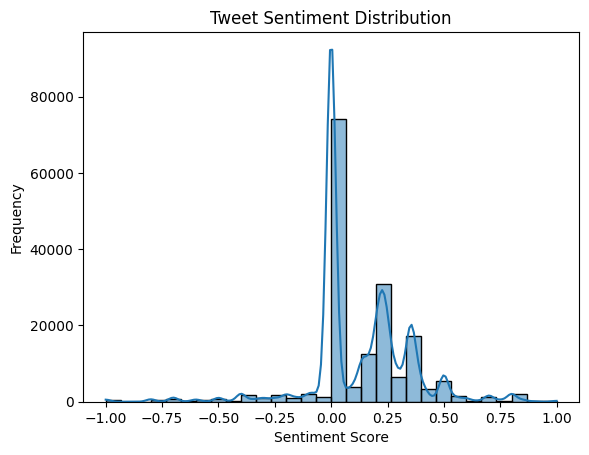

In [19]:
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity  # Score between -1 (negative) to 1 (positive)

df['sentiment'] = df['cleaned_tweet'].apply(get_sentiment)

sns.histplot(df['sentiment'], bins=30, kde=True)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Tweet Sentiment Distribution')
plt.show()

In [20]:
df.to_csv('processed_tweets.csv', index=False)
